In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv")
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


1. Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del
nome_area

In [ ]:
df = df.drop(columns=["area","codice_NUTS1","codice_NUTS2","codice_regione_ISTAT"])
df

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


2. Eliminare i dati nulli

In [ ]:
df.dropna(inplace=True)

3. Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune
non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali

In [ ]:
comune = input("Scrivere il nome del comune ")
if comune in df["comune"].tolist():
  print(df.loc[df["comune"]==comune,"presidio_ospedaliero"])
else:
  print("Il comune non esiste")

Scrivere il nome del comune MILANO
128    ASST FATEBENEFRATELLI SACCO 03091000 - MILANO ...
129                          ASST FBF SACCO - P.O. SACCO
130                                ASST GAETANO PINI CTO
131          ASST GRANDE OSPEDALE METROPOLITANO NIGUARDA
132                             ASST SANTI PAOLO E CARLO
133    ASST SANTI PAOLO E CARLO 03091500 - MILANO OSP...
134    FONDAZIONE IRCCS CA' GRANDA OSPEDALE MAGGIORE ...
135    FONDAZIONE IRCCS ISTITUTO NAZIONALE DEI TUMORI...
136          FONDAZIONE IRCCS ISTITUTO NEUROLOGICO BESTA
137           GRUPPO MULTIMEDICA - OSPEDALE SAN GIUSEPPE
138                          IRCCS OSPEDALE SAN RAFFAELE
139             IRCSS SANTA MARIA NASCENTE (DON GNOCCHI)
140     ISTITUTO AUXOLOGICO ITALIANO - OSPEDALE SAN LUCA
141                                PIO ALBERGO TRIVULZIO
Name: presidio_ospedaliero, dtype: object


4. Visualizzare il numero di punti vaccinali di ogni regione. Visualizzare il nome della regione e il numero di
punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più
punti vaccinali a quella che ne ha di meno)

In [ ]:
df2 = df.groupby("nome_area")["presidio_ospedaliero"].count().sort_values(ascending=False)
df2

nome_area
Lombardia                             65
Sicilia                               33
Piemonte                              28
Campania                              27
Lazio                                 20
Liguria                               14
Emilia-Romagna                        13
Toscana                               12
Sardegna                              12
Puglia                                11
Veneto                                 7
Abruzzo                                7
Marche                                 7
Provincia Autonoma Bolzano / Bozen     7
Calabria                               6
Friuli-Venezia Giulia                  5
Basilicata                             5
Umbria                                 4
Provincia Autonoma Trento              3
Valle d'Aosta / Vallée d'Aoste         2
Molise                                 2
Name: presidio_ospedaliero, dtype: int64

5. Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

<function matplotlib.pyplot.show>

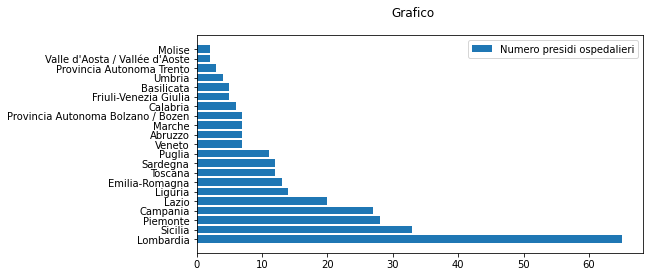

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.barh(df2.index,df2.values,label="Numero presidi ospedalieri")
ax.legend()
plt.suptitle("Grafico")
plt.show

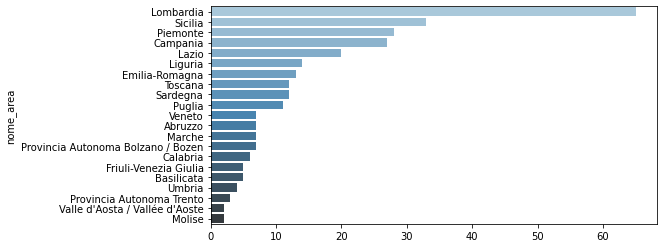

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
sns.barplot(x =df2.values ,y =df2.index , palette="Blues_d")

6. Visualizzare il numero di province per ogni regione

In [ ]:
df = df.drop_duplicates(subset="provincia")
df3 = df.groupby("nome_area")["provincia"].count()
df3

nome_area
Abruzzo                                4
Basilicata                             2
Calabria                               5
Campania                               5
Emilia-Romagna                         9
Friuli-Venezia Giulia                  4
Lazio                                  6
Liguria                                5
Lombardia                             12
Marche                                 5
Molise                                 1
Piemonte                               8
Provincia Autonoma Bolzano / Bozen     1
Provincia Autonoma Trento              1
Puglia                                 6
Sardegna                               8
Sicilia                                9
Toscana                               10
Umbria                                 2
Valle d'Aosta / Vallée d'Aoste         1
Veneto                                 7
Name: provincia, dtype: int64

7. Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda

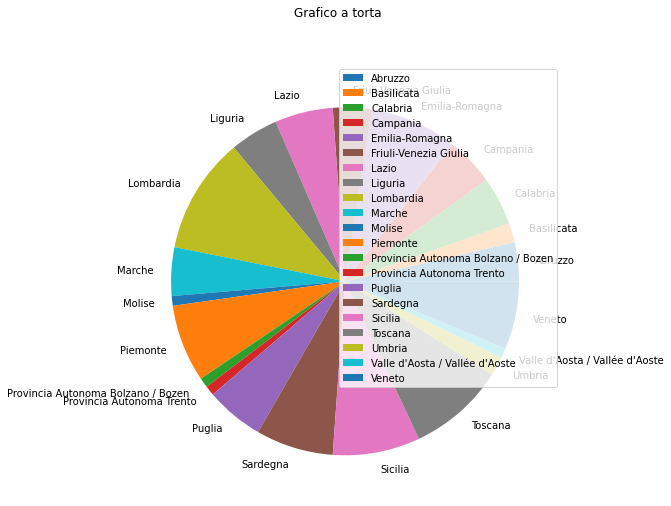

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.pie(df3.values,labels = df3.index)
ax.legend(df3.index)
plt.suptitle("Grafico a torta")
plt.show()

8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre
colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il
grafico a torta

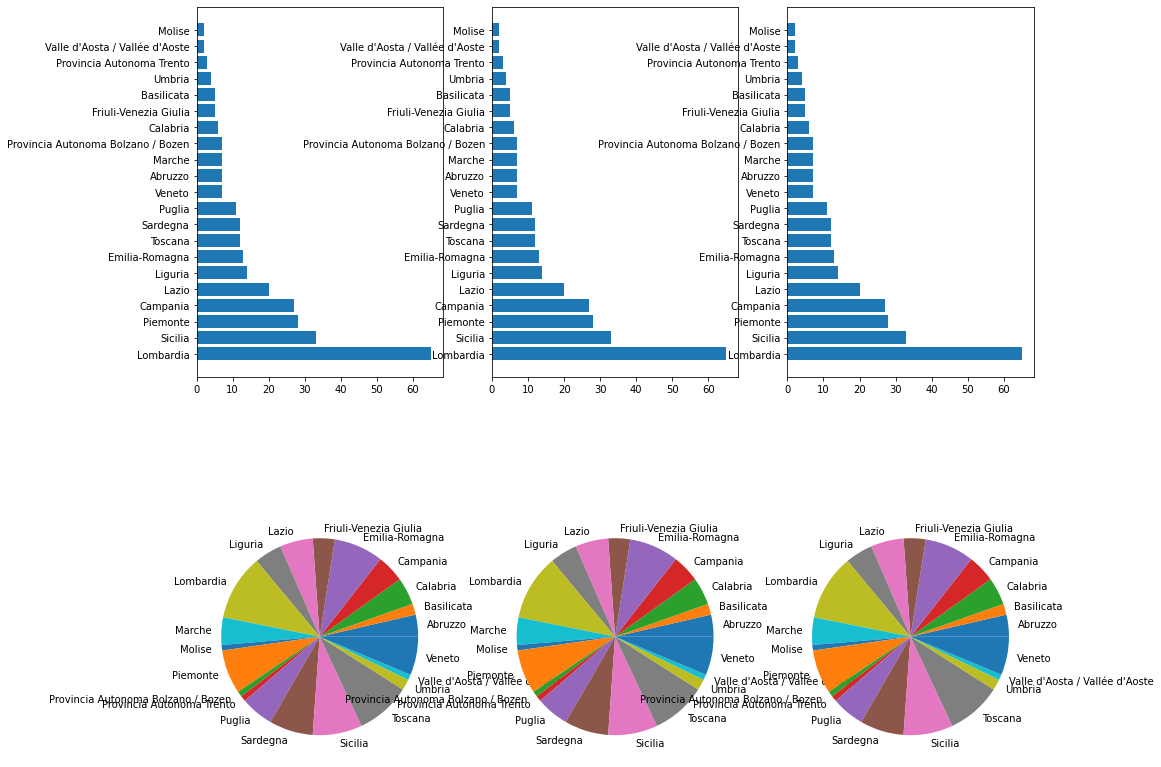

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,15))
ax1.barh(df2.index,df2.values,label="Numero presidi ospedalieri")
ax2.barh(df2.index,df2.values,label="Numero presidi ospedalieri")
ax3.barh(df2.index,df2.values,label="Numero presidi ospedalieri")

ax4.pie(df3.values,labels = df3.index)
ax5.pie(df3.values,labels = df3.index)
ax6.pie(df3.values,labels = df3.index)
plt.show()

9. Salvare il grafico in un file .png

In [ ]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>